In [1]:
import torch
import math

from ellipse_utils import (
    sample_2d_circle,
    ellipsify,
    get_ellipse_patch,
)

import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["mathtext.fontset"] = "stix"
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rcParams[
    "text.latex.preamble"
] = r"\usepackage{amsmath}\usepackage{amssymb}\usepackage{color}"

In [2]:
tkwargs = {"dtype": torch.double, "device": "cpu"}

num_surface_samples = 2**10
t = torch.linspace(0, 1, num_surface_samples, **tkwargs)
surface_samples = torch.column_stack(
    [torch.cos(2 * torch.pi * t), torch.sin(2 * torch.pi * t)]
)
basic_ring = 0.5 * surface_samples
scaled_ring = 2 * (0.5 * surface_samples) / 3

centre = torch.zeros(2, **tkwargs)

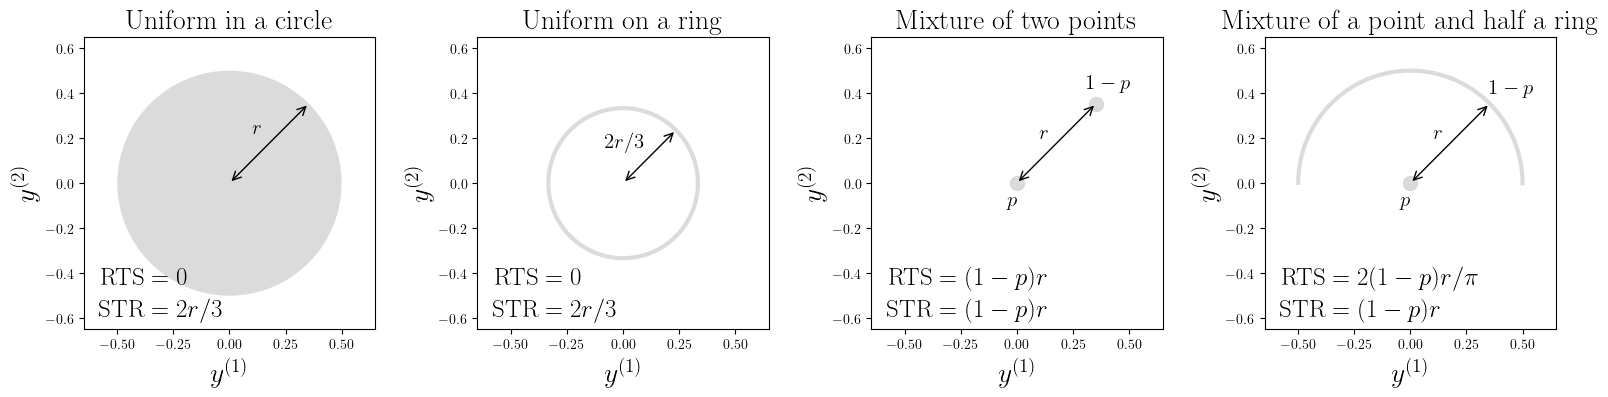

In [3]:
fig, axes = plt.subplots(1, 4, figsize=(19, 3.8))

plt.subplots_adjust(
    left=None, bottom=None, right=None, top=None, wspace=0.35, hspace=0.15
)
#########################################################################################
ax = plt.subplot(1, 4, 1)
ellipse, transform = get_ellipse_patch(
    radius=[0.5, 0.5],
    angle=0,
    translate=centre,
    alpha=0.8,
    facecolor="lightgray",
)
ellipse.set_transform(transform + ax.transData)
ax.add_patch(ellipse)
arrow = mpatches.FancyArrowPatch(
    (0, 0), (0.3536, 0.3536), arrowstyle="<->", mutation_scale=15
)
ax.add_patch(arrow)
ax.annotate(r"$r$", (0.1, 0.22), fontsize=15, color="k")
ax.annotate(r"$\text{RTS}=0$", (-0.571, -0.45), fontsize=18, color="k")
ax.annotate(r"$\text{STR}=2r/3$", (-0.58, -0.59), fontsize=18, color="k")
plt.title("Uniform in a circle", fontsize=20)
#########################################################################################
ax = plt.subplot(1, 4, 2)
plt.plot(
    scaled_ring[:, 0], scaled_ring[:, 1], alpha=0.8, color="lightgray", linewidth=3
)
arrow = mpatches.FancyArrowPatch(
    (0, 0), (0.2357, 0.2357), arrowstyle="<->", mutation_scale=15
)
ax.add_patch(arrow)
ax.annotate(r"$2r/3$", (-0.08, 0.16), fontsize=15, color="k")
ax.annotate(r"$\text{RTS}=0$", (-0.572, -0.45), fontsize=18, color="k")
ax.annotate(r"$\text{STR}=2r/3$", (-0.58, -0.59), fontsize=18, color="k")
plt.title("Uniform on a ring", fontsize=20)
#########################################################################################
ax = plt.subplot(1, 4, 3)
plt.scatter(centre[0], centre[1], alpha=0.8, color="lightgray", s=100)
plt.scatter(centre[0] + 0.3536, centre[1] + 0.3536, alpha=0.8, color="lightgray", s=100)
arrow = mpatches.FancyArrowPatch(
    (0, 0), (0.3536, 0.3536), arrowstyle="<->", mutation_scale=15
)
ax.add_patch(arrow)
ax.annotate(r"$r$", (0.1, 0.2), fontsize=15, color="k")
ax.annotate(r"$p$", (-0.05, -0.1), fontsize=15, color="k")
ax.annotate(r"$1-p$", (0.31, 0.42), fontsize=15, color="k")
ax.annotate(r"$\text{RTS}=(1-p)r$", (-0.571, -0.45), fontsize=18, color="k")
ax.annotate(r"$\text{STR}=(1-p)r$", (-0.58, -0.59), fontsize=18, color="k")
plt.title("Mixture of two points", fontsize=20)
#########################################################################################
ax = plt.subplot(1, 4, 4)
half = int(num_surface_samples / 2)
plt.plot(
    basic_ring[:half, 0],
    basic_ring[:half, 1],
    alpha=0.8,
    color="lightgray",
    linewidth=3,
)
plt.scatter(centre[0], centre[1], alpha=0.8, color="lightgray", s=100)
arrow = mpatches.FancyArrowPatch(
    (0, 0), (0.3536, 0.3536), arrowstyle="<->", mutation_scale=15
)
ax.add_patch(arrow)
ax.annotate(r"$r$", (0.1, 0.2), fontsize=15, color="k")
ax.annotate(r"$p$", (-0.05, -0.1), fontsize=15, color="k")
ax.annotate(r"$1-p$", (0.35, 0.4), fontsize=15, color="k")
ax.annotate(r"$\text{RTS}=2(1-p)r/\pi$", (-0.572, -0.45), fontsize=18, color="k")
ax.annotate(r"$\text{STR}=(1-p)r$", (-0.58, -0.59), fontsize=18, color="k")
plt.title("Mixture of a point and half a ring", fontsize=20)

for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.xlim(-0.65, 0.65)
    plt.ylim(-0.65, 0.65)
    plt.xlabel(r"$y^{(1)}$", fontsize=20)
    plt.ylabel(r"$y^{(2)}$", fontsize=20)

plt.show()